# СОЦИАЛЬНЫЕ МЕДИА

In [376]:
with open('files/corrected_sents.txt') as f:
    contents = [x.strip() for x in f.readlines()]

In [2]:
contents[:10]

['очень классная тетка кто бы что ни говорил',
 'Может выгоднее втулку продать и купить колесо в сборе',
 'Довольно большая часть пришедших сходила с дорожек и усаживалась на траву',
 'Симпатичнейшее шпионское устройство такой себе гламурный фотоаппарат девушки Бонда миниатюрная модель камеры Superheadz Clap Camera',
 'Апофеозом дня для меня сегодня стала фраза услышанная в новостях',
 'Ну не было поста так не было',
 'Хотя странно когда я забирала к себе на выходные старого кота который живет у родителей да и собаку в придачу то такого концерта мой кот не устраивал',
 'Думаю что лет через 10 ретроспективно просматривать это будет мне невероятно интересно',
 'Зато я считаю что это будет полезно и для меня и для всех тех кто меня окружает ведь когда расстаешься с человеком на какое-то время то многое становится прозрачным я имею ввиду мы начинаем понимать какое место в нашей повседневности занимает этот человек',
 'Поясним эту мысль']

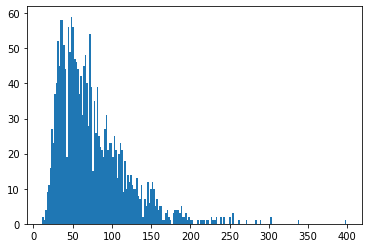

In [5]:
from matplotlib import pyplot as plt
plt.hist(list(map(len,contents)), bins=200);

In [6]:
len(contents)

2000

# СУБТИТРЫ

In [378]:
count =0
subs = []
counts = [0 for i in range(7)]
with open('files/OpenSubtitles.en-ru.ru') as f:
    while True:
        line = f.readline().strip()
        if not line:
            break
        for i in range(7):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=1500):
                    subs.append(line)
                    counts[i]+=1
            elif(len(line)>6*50):
                subs.append(line)
                counts[-1]+=1
        if (sum(counts))>=7*1500:
            break
        if((sum(counts))%3000==0):
            print(counts)

[1501, 1262, 194, 36, 7, 0, 0]
[1501, 1262, 194, 36, 7, 0, 0]
[1501, 1262, 194, 36, 7, 0, 0]
[1501, 1262, 194, 36, 7, 0, 0]
[1501, 1262, 194, 36, 7, 0, 0]
[1501, 1262, 194, 36, 7, 0, 0]
[1501, 1501, 1501, 1152, 258, 45, 42]


In [379]:
sum(counts)

10500

In [56]:
counts

[1501, 1501, 1501, 1501, 1501, 1035, 1960]

In [59]:
subs = list(set(subs))

In [60]:
len(subs)

8600

In [76]:
subs = list(filter(lambda x: not(('ьι' in x) or ('€' in x) or ('#' in x)), subs))

In [77]:
len(subs)

8123

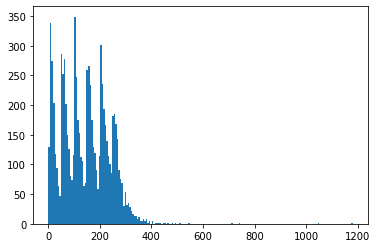

In [78]:
plt.hist(list(map(len,subs)), bins=200);

In [287]:
subs[:10]

['Я позвоню вашим родителям или опекунам ничего вы от меня не получите!',
 'Если он хотел нанести тебе этим оскорбление, я думаю, что можно подать иск по статье... 819, да, по 819.',
 'Кампания под девизом: "ОСТАНОВИТЕ ГОУСТВУД!" направлена на то, чтобы не допустить превращения бесноватыми застройщиками наших прекрасных лесов Северо-Запада в чудовищный парк развлечений и разрушения заповедников, в которых животные мирно обитали на протяжении столетий, этих маленьких миров,служащих',
 'Однако визит доблестного самурая Мотоме Чидживы, который не побоялся умереть, совершив харакири, и мы, служащие клана Ии, которые с честью провели ритуал, дабы исполнить его последнюю волю, - все это послужит примером для бесчестных ронинов',
 'Но, Френки, я не знал, что это твои деньги, я думал, что забрал бутеры.',
 'Ага. Реально жёстко.',
 '- Возраст?',
 'Он там, в том направлении.',
 'Сначала они выбирают место недалеко от берега реки, затем, с помощью своих женщин, родителей и друзей, уничтожают раст

# Новости

In [119]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiyagavrilova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
import pandas as pd
df = pd.read_csv('news.csv',  usecols=['text'],nrows=5000)

In [121]:
df

,text
0,В 1930-е годы Советский Союз охватила лихорадк...
1,Олимпийская чемпионка по фигурному катанию Ал...
2,Российский врач-диетолог Римма Мойсенко объясн...
3,В 2019 году телеканал «Ю» запустил адаптацию з...
4,Актер Михаил Ефремов систематически употребл...
...,...
4995,"ЦБ против того, чтобы облегчить МВД доступ к б..."
4996,В Москве за сутки умерли 67 пациентов с корона...
4997,Число официально зарегистрированных безработны...
4998,28 апреля в ютьюбе прошел онлайн-митинг «За жи...


In [122]:
from unicodedata import normalize
normalize('NFKD', s)

counts = [0 for i in range(7)]
sents_news = []
for i, text in df.iterrows():
    lines = tokenize.sent_tokenize(text['text'])
    for line in lines:
        for i in range(7):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=1500):
                    sents_news.append(normalize('NFKD', line))
                    counts[i]+=1
                    break
            elif(len(line)>6*50):
                sents_news.append(normalize('NFKD', line))
    if (sum(counts))>=7*1500:
        break
    if((sum(counts))%1000==0):
        print(counts)

[799, 1501, 1501, 818, 273, 87, 21]
[1501, 1501, 1501, 1501, 721, 214, 61]
[1501, 1501, 1501, 1501, 721, 214, 61]
[1501, 1501, 1501, 1501, 721, 214, 61]
[1501, 1501, 1501, 1501, 1444, 436, 116]
[1501, 1501, 1501, 1501, 1444, 436, 116]
[1501, 1501, 1501, 1501, 1444, 436, 116]
[1501, 1501, 1501, 1501, 1444, 436, 116]


In [123]:
# sents = []
# from nltk import tokenize
# for i, text in df.iterrows():
#     sents +=tokenize.sent_tokenize(text['text'])

In [285]:
sents_news = list(set(sents_news))
sents_news[:10]

['Прописанный с какой-то толстовской обстоятельностью, свободой и раздумчивостью.',
 'Он выложил скриншот первого сообщения от звезды, в котором она спросила, можно ли сделать нечто особенное с ножами, которые она заказала на платформе Etsy.',
 'После этого она добавила 200 граммов томатной пасты, чашку красного вина, чашку мясного бульона, чабрец и приготовленные раннее лук и чеснок, готовила их пять минут и оставила на малом огне еще на час.',
 'В Белоруссии 9 августа прошли президентские выборы.',
 'Нам с детства внушали, что мы самые счастливые, потому что родились и живём в самой лучшей стране, СССР!',
 'Задержаны несколько тысяч человек.',
 'На этой неделе доллар  подбирался  к уровню 76 рублей, а евро доходил до 89,4 рубля.',
 '4 июля стало известно о его смерти.',
 'На кадре он стоит у Дворца независимости.',
 'Игрока в американский футбол Сенкеса Джермэйна Перри убили во сне.']

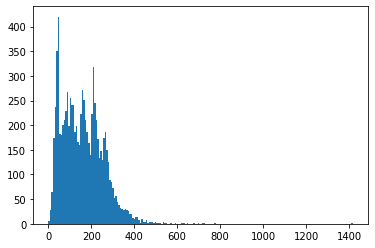

In [125]:
plt.hist(list(map(len,sents_news)), bins=200);

In [126]:
len(sents_news)

8634

# ЛИТЕРАТУРА

In [104]:
df = pd.read_csv('files/zlatoust_paragraph_aligned_with_bleualign.csv', usecols=['source'])
df

,source
0,"— И очень хорошо сделали, что не обратились к ..."
1,"Чужестранец все прохаживался, но, увидев, что ..."
2,"Шипучин. Нет, я не вынесу! (Плачет.) Не вынесу..."
3,"— Очень много, — краснея и с глупой, небрежной..."
4,Вечер и вправду складывался весело.
...,...
5961,Статуя Я на зов явился.
5962,— А по батюшке?
5963,"Князь, может быть, и ответил бы что-нибудь на ..."
5964,Они стали говорить о Лизавете. Студент рассказ...


In [115]:
counts = [0 for i in range(7)]
sents_litre = []
for i, text in df.iterrows():
    lines = tokenize.sent_tokenize(text['source'])
    for line in lines:
        for i in range(7):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=1500):
                    sents_litre.append(normalize('NFKD', line))
                    counts[i]+=1
                    break
            elif(len(line)>6*50):
                sents_litre.append(normalize('NFKD', line))
    if (sum(counts))>=7*1500:
        break
    if((sum(counts))%1000==0):
        print(counts)

[498, 245, 145, 70, 22, 15, 5]
[1010, 504, 262, 125, 53, 35, 11]
[1501, 1501, 1501, 820, 398, 185, 94]
[1501, 1501, 1501, 820, 398, 185, 94]
[1501, 1501, 1501, 820, 398, 185, 94]


In [286]:
sents_litre = list(set(sents_litre))
sents_litre[:10] 

['И он задумался о том, где ему окончить нынешний вечер.',
 'Можно просидеть несколько часов, поджав ноги в одном и том же положении, если знаешь, что ничто не помешает переменить положение; но если человек знает, что он должен сидеть так с поджатыми ногами, то сделаются судороги, ноги будут дергаться и тискаться в то место, куда бы он хотел вытянуть их.',
 'И вдруг совершенно другая, не боль, а общая мучительная внутренняя неловкость заставила его забыть на мгновение боль зуба.',
 'А все те же звуки раздаются с бастионов, все так же — с невольным трепетом и суеверным страхом — смотрят в ясный вечер французы из своего лагеря на желтоватую изрытую землю бастионов Севастополя, на черные движущиеся по ним фигуры наших матросов и считают амбразуры, из которых сердито торчат чугунные пушки; все так же в трубу рассматривает с вышки телеграфа штурманский унтер-офицер пестрые фигуры французов, их батареи, палатки, колонны, движущиеся по Зеленой горе, и дымки, вспыхивающие в траншеях, и все

In [288]:
len(sents_litre)

7281

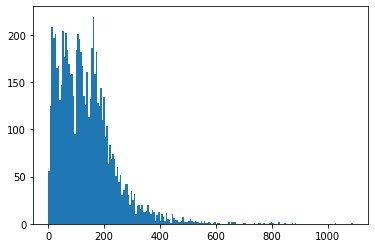

In [117]:
plt.hist(list(map(len,sents_litre)), bins=200);

# Generate errors

In [363]:
SOS = '\t' 
EOS = '*' 
chars = list('йцукенгшщзхъфывапролджэячсмитьбюёЙЦУКЕНГШЩЗХЪЭЖДЛОРПАВЫФЯЧСМИТЬБЮЁ')
REMOVE_CHARS = '[#$%"\+@<=>!&,-.?:;()*\[\]^_`{|}~/\d\t\n\r\x0b\x0c]'

import numpy as np 
import random
def add_spelling_errors(token, error_rate=0.5):
    
    assert(0.0 <= error_rate < 1.0)
    if len(token) < 3:
        return token
    rand = np.random.rand()
   
    prob = error_rate / 4.0
    if rand < prob: # вставка лишнего символа
        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + np.random.choice(chars) \
                + token[random_char_index + 1:]
    elif prob < rand < prob * 2: # пропуск символа

        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + token[random_char_index + 1:]
    elif prob * 2 < rand < prob * 3: #замена символа
        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + np.random.choice(chars) \
                + token[random_char_index:]
    elif prob * 3 < rand < prob * 4: # буквы поменяны местами
        random_char_index = np.random.randint(len(token) - 1)
        token = token[:random_char_index]  + token[random_char_index + 1] \
                + token[random_char_index] + token[random_char_index + 2:]

    return token

def add_errors(sent):
    num_err = random.randint(1, max(1,len(sent)//10))
    
    for i in range(num_err):
        sent = add_spelling_errors(sent)
    return sent

In [364]:
# from random import shuffle
# shuffle(dataset)

In [365]:
dataset = contents[:2000]+sents_litre[:4000]+sents_news[:4000]+subs[:4000]

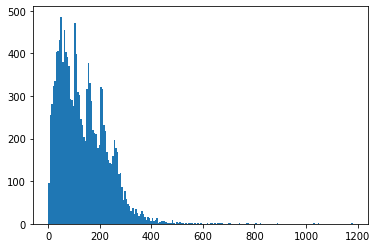

In [366]:
plt.hist(list(map(len,dataset)), bins=200);

In [367]:
len(dataset)

14000

In [368]:
dataset[-20:]

['В заключение капитолийские волчата, юные итальянцы, продефилировали перед собранием торжественным маршем, а затем приняли участие в обеде, включающем хлеб, прославленные национальные сыры и чашку горячего каркаде.',
 'Некоторые вещи требуют доработки.',
 'Он сильно расстроился из-за этого и даже ужинал со мной.',
 'Что ж, если у тебя нет чувств к нему, тогда ты можешь подойти вон к тому милому парню.',
 'Вспомни, она приезжала к той девушке, вышедшей за того парня, родственника тех людей, у которых была на юге дочь?',
 'На первый взгляд казалось, здесь невозможно потеряться... на протяжении прямолинейных аллей, среди статуй с застывшими жестами и гранитных плит, где вы теперь уже потерялись навсегда, в тихой ночи одна со мной.',
 'Как вам жилось? да и здесь по чистой случайности встретила?',
 'Это значит, что мы должны быть готовы работать с нашими соседями, независимо от того, разделяют ли они наши взгляды, принадлежат ли они к другому профсоюзу, или к другой расе.',
 'Бретон написа

In [369]:
with open('files/source_sents.txt') as f:
    bad_sents = [x.strip() for x in f.readlines()]

In [370]:
for sent in dataset[2000:]:
    bad_sents.append(add_errors(sent))

In [371]:
bad_sents[-10:]

['- Итак, джентльмены используя этот специальный препарат который соедржит оксид азота пропуская через определенныефильтры я смогу ввергнуть пациента в безсознательное состояние,',
 'Капитану Бенджамиыну Лафайету Сиско, в знак Жризнаник за выдающиеся лидерские качестван за достойное командование в борьбе с врагом, и в особенности, за лтчную храбрость, проявленную в сражении за взятие "Дип Спейс 9", командование звездного флота с гордостью вручает вам',
 'Кто-нитудьЫ пожалуйста, скажите, что за чертовина тут происходит?',
 'Думаю Джерард как раз та причина, почему в семье Арджентов ток много зла.',
 'ДосВигнув других миров, отправленные с нашей безнадёжно перенаселённой планеты, зонды нашли планету, подходящую для жзни на ней человека она находится на орибте вокруг звезды Альфа Центавра и является единственной из подходящих планет, которую мы можем достичь используя имеющиеся у нас технологии.',
 'Я тебя миллион раз спрашивала, с кем ты пишьп и тыл гала мне.',
 'И когда я узнала ,что эт

In [373]:
pd.DataFrame({'source':bad_sents, 'target':dataset}).to_csv('data/dataset.csv')